In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
data = pd.read_csv("hotel_bookings.csv")
data.shape

(119390, 32)

In [119]:
# copy the data set  -> so our original dataset remains unchanged
df = data.copy()

In [120]:
df.shape

(119390, 32)

In [121]:
dublicate = df.duplicated().sum()
dublicate

31994

In [122]:
df.drop(dublicate, inplace=True)

In [123]:
df.shape

(119389, 32)

In [124]:
df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
26813,Resort Hotel,0,7,2016,August,33,11,0,1,2,...,No Deposit,240.0,NaN,0,Transient,231.00,1,0,Check-Out,12-08-16
87605,City Hotel,0,28,2016,April,17,21,0,2,2,...,No Deposit,9.0,NaN,0,Transient,109.00,0,1,Check-Out,23-04-16
33762,Resort Hotel,0,28,2017,February,8,23,2,5,2,...,No Deposit,240.0,NaN,0,Transient,69.71,0,2,Check-Out,02-03-17
10385,Resort Hotel,1,182,2017,March,9,1,8,22,2,...,No Deposit,240.0,NaN,0,Transient,130.00,0,1,Canceled,24-11-16
70151,City Hotel,1,17,2017,June,24,11,2,1,2,...,No Deposit,9.0,NaN,0,Transient,129.00,0,1,Canceled,25-05-17
60311,City Hotel,1,277,2016,November,46,7,1,2,2,...,Non Refund,NaN,NaN,0,Transient,100.00,0,0,Canceled,04-04-16
92752,City Hotel,0,108,2016,July,28,6,1,4,3,...,No Deposit,9.0,NaN,0,Transient,138.55,0,2,Check-Out,11-07-16
36980,Resort Hotel,0,4,2017,June,22,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,122.00,0,1,Check-Out,03-06-17
86475,City Hotel,0,165,2016,March,14,30,1,4,2,...,No Deposit,8.0,NaN,0,Transient,94.18,0,0,Check-Out,04-04-16
12570,Resort Hotel,1,8,2017,July,27,5,0,1,1,...,No Deposit,NaN,254.0,0,Transient,135.00,0,0,Canceled,28-06-17


1. Dealing with Missing Values

In [125]:
df.isnull().sum().sort_values(ascending=False)

company                           112592
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In the agent and the company column, we have id_number for each agent or company, so for all the missing values, we will just replace it with 0.

In [126]:
df[["agent", "company"]] = df[["agent", "company"]].fillna(0)

In [127]:
# for missing children value, replace it with rounded mean value
df["children"] = df["children"].fillna(data["children"].mean())

In [128]:
## For the missing values in the country column, replace it with mode (value that appears most often)
df["country"] = df["country"].fillna(data["country"].mode())

In [129]:
df[(df["adults"] + df["children"] + df["babies"]) == 0].shape

(180, 32)

In [130]:
df[(df["adults"] == 0) & (df["children"] == 0) & (df["babies"] == 0)].shape

(180, 32)

In [131]:
df = df.drop(df[(df.adults + df.babies + df.children) == 0].index)

In [132]:
data.shape[0] - df.shape[0]

181

### 2. Converting Datatype

In [133]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [134]:
## convert datatype of these columns from float to integer
df[["children", "company", "agent"]] = df[["children", "company", "agent"]].astype(
    "int64"
)

### Exploratory Data Analysis

1. How Many Booking Were Cancelled?

In [135]:
df["is_canceled"].value_counts()

is_canceled
0    75010
1    44199
Name: count, dtype: int64

In [136]:
cancel_per = df["is_canceled"].value_counts() / df.shape[0] * 100
cancel_per

is_canceled
0    62.923101
1    37.076899
Name: count, dtype: float64

Text(0.5, 1.0, 'Bookin is cancle or not')

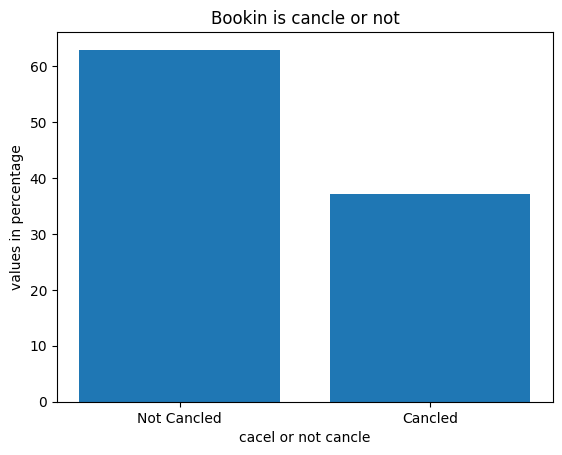

In [137]:
plt.bar(["Not Cancled", "Cancled"], cancel_per)
plt.xlabel("cacel or not cancle")
plt.ylabel("values in percentage")
plt.title("Bookin is cancle or not")

2. What is the booking ratio between Resort Hotel and City Hotel?

In [138]:
df["hotel"].value_counts()

hotel
City Hotel      79163
Resort Hotel    40046
Name: count, dtype: int64

In [139]:
hotel_diff = df["hotel"].value_counts() / df.shape[0] * 100
hotel_diff

hotel
City Hotel      66.406899
Resort Hotel    33.593101
Name: count, dtype: float64

Text(0, 0.5, 'Total Booking(%)')

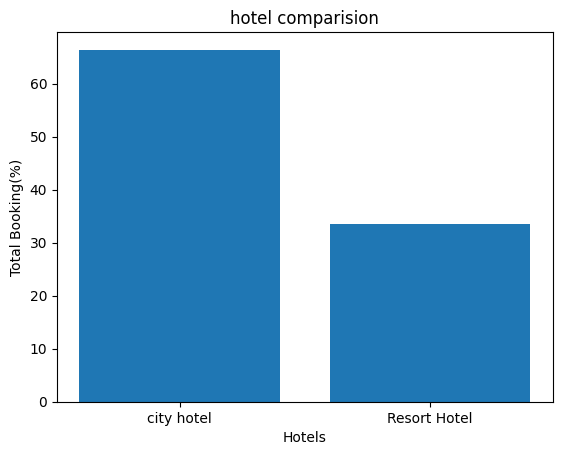

In [140]:
plt.bar(["city hotel", "Resort Hotel"], hotel_diff)
plt.title("hotel comparision")
plt.xlabel("Hotels")
plt.ylabel("Total Booking(%)")

3. What is the percentage of booking for each year?

In [141]:
df["arrival_date_year"].value_counts().sort_index()

arrival_date_year
2015    21967
2016    56623
2017    40619
Name: count, dtype: int64

In [142]:
year_per = df["arrival_date_year"].value_counts().sort_index() / df.shape[0] * 100
year_per

arrival_date_year
2015    18.42730
2016    47.49893
2017    34.07377
Name: count, dtype: float64

(0.0, 50.0)

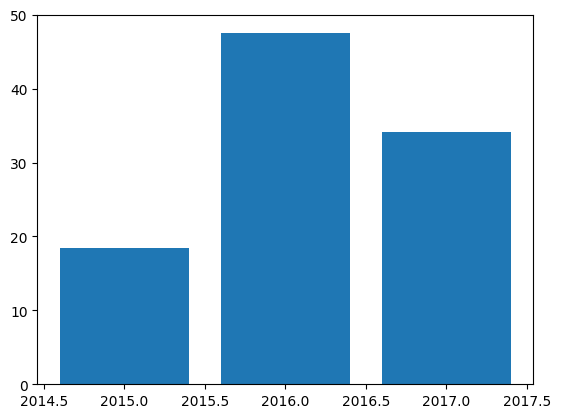

In [143]:
plt.bar([2015, 2016, 2017], year_per)
plt.ylim(0, 50)

4. Which is the busiest month for hotels?


In [144]:
month = df["arrival_date_month"].value_counts().sort_index()
month

arrival_date_month
April        11078
August       13861
December      6759
February      8052
January       5920
July         12644
June         10929
March         9768
May          11780
November      6771
October      11147
September    10500
Name: count, dtype: int64

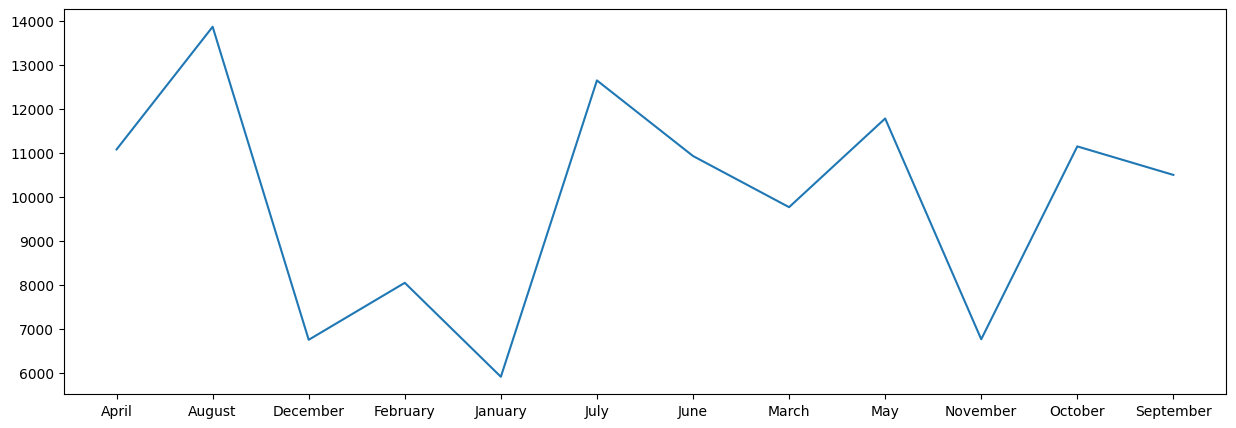

In [145]:
plt.figure(figsize=(15, 5))
plt.plot(month.index, month)

5. From which country most guests come?

In [146]:
contry_per = df["country"].value_counts() / df.shape[0] * 100
contry_per = contry_per.sort_values(ascending=False).head(10)
contry_per

country
PRT    40.670587
GBR    10.166179
FRA     8.725012
ESP     7.180666
DEU     6.111116
ITA     3.154963
IRL     2.830323
BEL     1.964617
BRA     1.863953
NLD     1.764129
Name: count, dtype: float64

Text(0.5, 1.0, 'counttry wise comapatison')

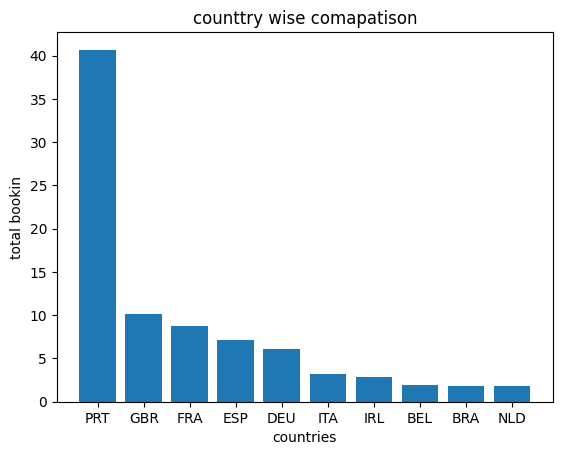

In [147]:
plt.bar(contry_per.index, contry_per)
plt.xlabel("countries")
plt.ylabel("total bookin")
plt.title("counttry wise comapatison")

6. How Long People Stay in the hotel?

In [148]:
total_nights = df["stays_in_week_nights"] + df["stays_in_weekend_nights"]
total_nights = (total_nights.value_counts().sort_index() / df.shape[0] * 100).head(10)[
    1:
]
total_nights

1    17.620314
2    23.179458
3    22.702984
4    14.573564
5     6.518803
6     3.226266
7     7.253647
8     0.968887
9     0.704645
Name: count, dtype: float64

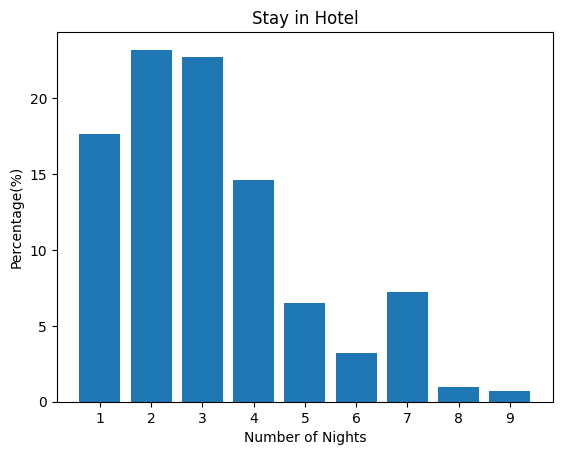

In [149]:
plt.bar(total_nights.index, total_nights)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.xlabel("Number of Nights")
plt.ylabel("Percentage(%)")
plt.title("Stay in Hotel")
plt.show()

Which was the most booked accommodation type (Single, Couple, Family)?

In [157]:
single = df[(df["adults"] == 1) & (df["children"] == 0) & (df["babies"] == 0)] 
couple = df[(df["adults"] == 2) & (df["children"] == 0) & (df["babies"] == 0)]
family = df[df["adults"] + df["children"] + df["babies"] > 2]

Text(0.5, 1.0, 'accommodation type')

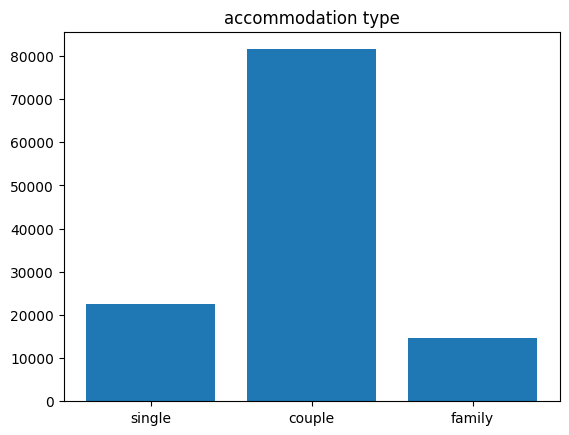

In [153]:
plt.bar(
    ["single", "couple", "family"], [single.shape[0], couple.shape[0], family.shape[0]]
)
plt.title("accommodation type")